#About dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [150]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\ASUS\Desktop\Salaries.csv")



the name of each column:

In [151]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

 Identify the number of rows and columns in the dataset

In [152]:
df.shape


(148654, 13)

 the data types of each column:

In [153]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

check for missing values in each 
column:

In [154]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

mean of salaries(totalpays):

In [155]:
mean_salary = df['TotalPay'].mean()
print(mean_salary)

74768.32197169267


max of salaries(totalpays):

In [156]:
max_salary=df['TotalPay'].max()
print(max_salary)

567595.43


min of salaries(totalpays):

In [157]:
min_salary=df['TotalPay'].min()

print(min_salary)

-618.13


median of of salaries(totalpays):

In [158]:
median_salary = df['TotalPay'].median()
print(median_salary)

71426.60999999999


salary range:

In [159]:
salary_range = df['TotalPay'].max() - df['TotalPay'].min() 
print(salary_range)

568213.56


the standard deviation:

In [160]:
std_dev = df['TotalPay'].std()  
print(std_dev)

50517.00527394987


data Cleaning:
I deleted the lines that contained many zeros, which indicates an error in the data, and I deleted the columns that did not contain information, then I replaced the empty cells related to salaries with the average for the column,and others that related to Overtime and other Pays with 0, and I replaced the non-numeric cells with “unkown”

In [161]:
zero_counts = df.eq(0).sum(axis=1) 
df = df[zero_counts <= 2]
df.to_csv(r'C:\Users\ASUS\Desktop\Salaries.csv', index=False)

nan_percent = df.isnull().sum() * 100 / len(df)
nan_threshold =50
df = df.loc[:, nan_percent <= nan_threshold]  
df.to_csv(r'C:\Users\ASUS\Desktop\Salaries.csv', index=False)

numeric_cols = df.select_dtypes(include=[np.number]).columns
cols_to_fill = [col for col in numeric_cols if col not in ['Year', 'TotalPay','TotalPayBenefits']]
df[cols_to_fill] = df[cols_to_fill].fillna(0)
cols_mean = df[numeric_cols].mean()
df[numeric_cols] = df[numeric_cols].fillna(cols_mean)
df.to_csv(r'C:\Users\ASUS\Desktop\Salaries.csv', index=False)
for col in numeric_cols:
    df[col] = df[col].mask(df[col] < 0, 0)

df.to_csv(r'C:\Users\ASUS\Desktop\Salaries.csv', index=False)

non_numeric_cols = df.columns.difference(numeric_cols)
df[non_numeric_cols] = df[non_numeric_cols].fillna("unknown")
df.to_csv(r'C:\Users\ASUS\Desktop\Salaries.csv', index=False)
print(df.isnull().sum())

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


distribution of salaries:

<Axes: >

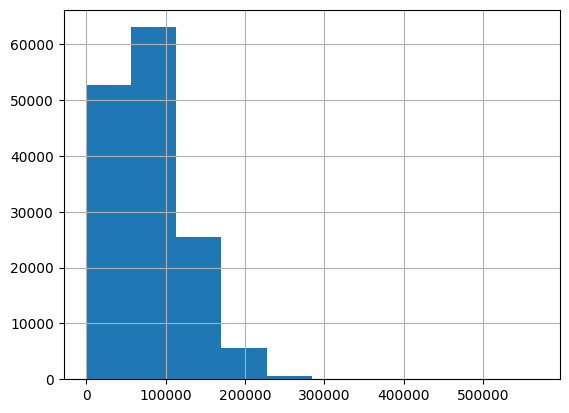

In [162]:
df['TotalPay'].hist()

pie charts to represent the proportion of employees 
in different departments:
Only top 10 sections were represented .

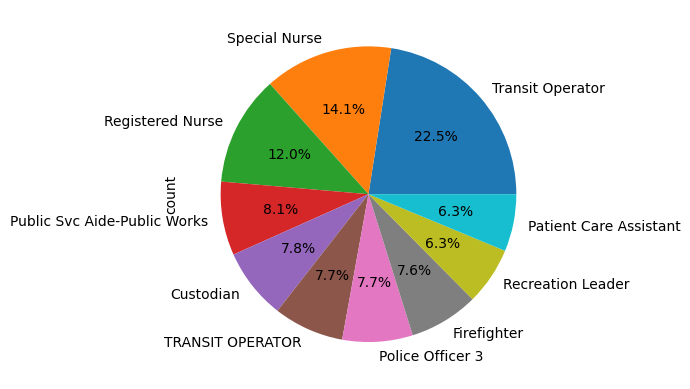

In [163]:
df['JobTitle'].value_counts().head(10).plot.pie(autopct='%1.1f%%')
dept_counts = df['JobTitle'].value_counts()
total_employees = len(df)

 average salary by Department:

In [164]:
df.groupby('JobTitle')['TotalPay'].mean()

JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2154, dtype: float64

number of employees by Department

In [165]:
counts = df.groupby('JobTitle')['TotalPay'].count()
sorted_counts = counts.sort_values(ascending=False)
for index, count in sorted_counts.items():
 print(f"For job title {index} there are {count} employees")

For job title Transit Operator there are 6987 employees
For job title Special Nurse there are 4361 employees
For job title Registered Nurse there are 3730 employees
For job title Public Svc Aide-Public Works there are 2497 employees
For job title Custodian there are 2404 employees
For job title TRANSIT OPERATOR there are 2387 employees
For job title Police Officer 3 there are 2385 employees
For job title Firefighter there are 2351 employees
For job title Recreation Leader there are 1958 employees
For job title Patient Care Assistant there are 1940 employees
For job title Deputy Sheriff there are 1921 employees
For job title Police Officer there are 1469 employees
For job title SPECIAL NURSE there are 1402 employees
For job title Public Service Trainee there are 1291 employees
For job title REGISTERED NURSE there are 1219 employees
For job title Police Officer 2 there are 1141 employees
For job title Attorney (Civil/Criminal) there are 1121 employees
For job title Porter there are 1092 

sum of salaries by Department

In [166]:
sums = df.groupby('JobTitle')['TotalPay'].sum()
sorted_sums = sums.sort_values(ascending=False)
for index, total in sorted_sums.items():
 print(f"For job title {index} the total pay sum is {total:,.2f}")

For job title Transit Operator the total pay sum is 455,276,770.97
For job title Registered Nurse the total pay sum is 432,216,343.15
For job title Firefighter the total pay sum is 344,069,561.98
For job title Police Officer 3 the total pay sum is 325,283,456.66
For job title Deputy Sheriff the total pay sum is 212,072,276.32
For job title Sergeant 3 the total pay sum is 172,388,710.84
For job title Police Officer 2 the total pay sum is 155,818,920.99
For job title Attorney (Civil/Criminal) the total pay sum is 155,332,464.09
For job title TRANSIT OPERATOR the total pay sum is 147,441,415.61
For job title Special Nurse the total pay sum is 144,441,112.87
For job title Police Officer the total pay sum is 142,106,998.03
For job title REGISTERED NURSE the total pay sum is 129,971,170.50
For job title EMT/Paramedic/Firefighter the total pay sum is 122,265,300.72
For job title Custodian the total pay sum is 113,764,812.53
For job title FIREFIGHTER the total pay sum is 110,597,884.48
For job

max salary per Department

In [167]:
df.groupby('JobTitle')['TotalPay'].max()

JobTitle
ACCOUNT CLERK                                     60838.20
ACCOUNTANT                                        65392.01
ACCOUNTANT INTERN                                 58799.53
ACPO,JuvP, Juv Prob (SFERS)                       62290.78
ACUPUNCTURIST                                     67594.40
                                                    ...   
X-RAY LABORATORY AIDE                             85077.40
X-Ray Laboratory Aide                             99812.97
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.87
Youth Comm Advisor                                57544.73
ZOO CURATOR                                       66686.56
Name: TotalPay, Length: 2154, dtype: float64

min salary per Department

In [168]:
df.groupby('JobTitle')['TotalPay'].min()

JobTitle
ACCOUNT CLERK                                       614.00
ACCOUNTANT                                         1148.40
ACCOUNTANT INTERN                                  2981.53
ACPO,JuvP, Juv Prob (SFERS)                       62290.78
ACUPUNCTURIST                                     67594.40
                                                    ...   
X-RAY LABORATORY AIDE                              5343.69
X-Ray Laboratory Aide                              1007.00
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.87
Youth Comm Advisor                                19212.71
ZOO CURATOR                                       66686.56
Name: TotalPay, Length: 2154, dtype: float64

mean of year per Department

In [169]:
means = df.groupby('JobTitle')['Year'].mean()
sorted_means = means.sort_values(ascending=False)
for index, mean in sorted_means.items():
 print(f"For job title {index} the average year is {mean:,.2f}")

For job title Hospital Eligibility Worker the average year is 2,014.00
For job title Administrative Hearing Sup the average year is 2,014.00
For job title Deputy Sheriff (SFERS) the average year is 2,014.00
For job title Sen Hospital Eligibility Wrkr the average year is 2,014.00
For job title Electrician Supervisor II the average year is 2,014.00
For job title Forensic Toxicologist Supervis the average year is 2,014.00
For job title HH Mechanical Shop Sprv the average year is 2,014.00
For job title HSA Social Worker the average year is 2,014.00
For job title HSA Sr Eligibility Worker the average year is 2,014.00
For job title Apprentice Cement Mason I the average year is 2,014.00
For job title Instructional Designer the average year is 2,014.00
For job title Legislative Clerk the average year is 2,014.00
For job title Water Quality Technician the average year is 2,014.00
For job title Lieutenant (Police Department) the average year is 2,014.00
For job title Light Rail Vehicle Equip Eng

Correlation Analysis:
between basepay and overtimepay

In [170]:
df[['BasePay','OvertimePay']].corr()

,BasePay,OvertimePay
BasePay,1.0000,0.2656
OvertimePay,0.2656,1.0000


<Axes: xlabel='BasePay', ylabel='OvertimePay'>

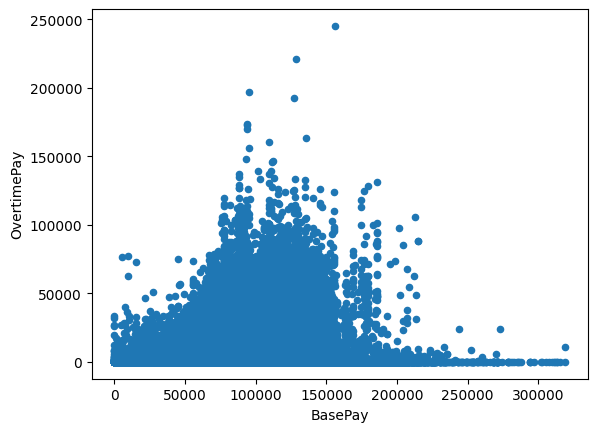

In [171]:
df.plot.scatter(x='BasePay', y='OvertimePay')

**Summary of Insights**:
The average salary across all employees was about 75k. The highest salary was over 567k, while the lowest was negative 618(that was before cleaning data).
The median salary was a bit lower at around 71k.
When it came to different job titles,transit operator, special nurses, nurses, and public works aides made up the biggest chunks of the workforce.
When grouping the data by Job Title, it showed the number of employees in each department ,Transit Operator have the max number of employees that was 6987 employees ,while there other departments have only one employe. It also summed the total salaries by department, with Transit Operator having the highest total around 455 million, while some departments only had one employee's salary. 
I found some important informations like the maximum, minimum, and average salaries within each department. For example, Account Clerks had a maximum salary of around 61k but some earned as little as 614. On average Account Clerks earned around 44k annually. 
It also calculated the average year for each department, showing employees had data  around 2014 or 2011 .
This grouped analysis provided a breakdown of salaries by department, identifying the largest and smallest in terms of employee count and total pay. It revealed the ranges of individual salaries within each role. This helped compare salaries and staffing levels across different jobs titles within the organization.
The distribution of salarie gave a good sense of where most people fell pay-wise.
There was a positive correlation shown between base pay and overtime pay on the scatter plot. So those earning more money regularly tended to also get more opportunities for overtime. The correlation wasn't super strong but it was definitely there.
In the end, this analysis shed some light on typical salaries, dominant jobs, differences between employers, how pay was spread out, and the link between base and extra pay.

# Good Luck!